<h1>Read data </h1>

In [38]:
import pandas as pd

data = pd.read_csv("stack-overflow-2018-developer-survey/survey_results_public.csv")
data.head()

/home/magda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


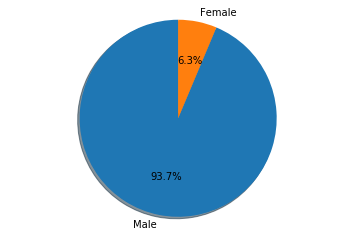

In [4]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Male', 'Female']

df = pd.DataFrame(data, columns=['Gender', 'Respondent']).groupby(by=['Gender']).agg({'Respondent':'count'}).reset_index()
df.rename(columns={'Respondent': 'RespondentsCount'}, inplace=True)


women_data  = df[df['Gender'] == "Female"]['RespondentsCount'].values[0]
men_data  = df[df['Gender'] == "Male"]['RespondentsCount'].values[0]

sizes = [men_data, women_data]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

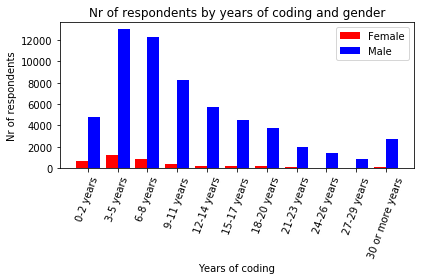

In [5]:
# Coding time

fig, ax = plt.subplots()

df = pd.DataFrame(data, columns=['YearsCoding', 'Gender', 'Respondent']).groupby(by=['YearsCoding', 'Gender']).agg({'Respondent':'count'}).reset_index()

yearsCodingLabels = ["0-2 years", "3-5 years", "6-8 years", "9-11 years",
                                                      "12-14 years", "15-17 years", "18-20 years", "21-23 years",
                                                      "24-26 years", "27-29 years", "30 or more years"]
df['YearsCoding'] = pd.Categorical(df['YearsCoding'], yearsCodingLabels)
df.sort_values(["YearsCoding", "Gender"], inplace=True)

genders = ["Male", "Female"]

df.rename(columns={'Respondent': 'RespondentsCount'}, inplace=True)

bar_width = 0.4

index = np.arange(len(yearsCodingLabels))

women_data  = np.array(df[df['Gender'] == "Female"]['RespondentsCount'])
ax.bar(index, women_data, bar_width, color='r',label='Female')

men_data  = np.array(df[df['Gender'] == "Male"]['RespondentsCount'])

ax.bar(index + bar_width, men_data, bar_width,
                color='b',label='Male')

ax.set_xlabel('Years of coding')
ax.set_ylabel('Nr of respondents')
ax.set_title('Nr of respondents by years of coding and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(yearsCodingLabels, rotation=70)
ax.legend()

fig.tight_layout()
plt.show()



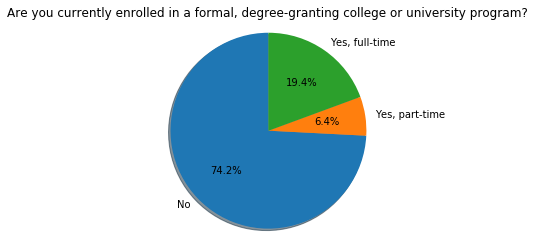

In [75]:

df = pd.DataFrame(data, columns=['Respondent', 'Student']).reset_index()
df.dropna(inplace=True)

student_col_values = pd.unique(df['Student'])

pie_chart_values = []

for std in student_col_values:
    std_data  = len(df[df['Student'] == std])
    pie_chart_values.append(std_data)

fig, ax = plt.subplots()
ax.pie(pie_chart_values, labels=student_col_values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Are you currently enrolled in a formal, degree-granting college or university program?')
plt.show()


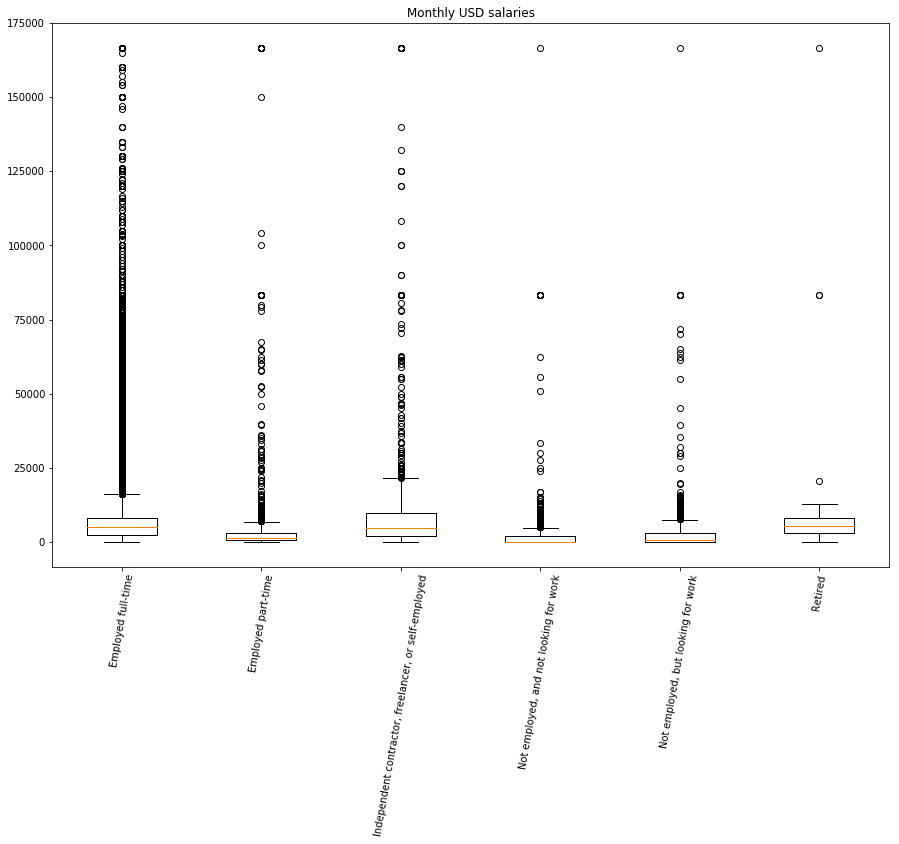

In [72]:
df = pd.DataFrame(data, columns=['Respondent', 'Employment', "ConvertedSalary"]).reset_index()
df.dropna(inplace=True)
employment_types = pd.unique(df['Employment'])
plot_data = []

for et in employment_types:
    salary_data_for_et = df[df['Employment'] == et]
    data_to_plot = salary_data_for_et['ConvertedSalary']
    plot_data.append(data_to_plot/12)
    
    
fig, ax = plt.subplots(figsize=(15, 10))
fig = fig.set()
ax.set_title('Monthly USD salaries')
ax.boxplot(plot_data, widths = 0.5)
ax.set_xticklabels(employment_types, rotation=80)

plt.show()